# Table of Contents
 <p><div class="lev1"><a href="#Importing-data">Importing data</a></div><div class="lev1"><a href="#Analyzing-the-columns">Analyzing the columns</a></div><div class="lev2"><a href="#Univariate-analysis">Univariate analysis</a></div><div class="lev3"><a href="#Survived">Survived</a></div><div class="lev3"><a href="#Class">Class</a></div><div class="lev3"><a href="#Name-/-Title">Name / Title</a></div><div class="lev3"><a href="#Age">Age</a></div><div class="lev3"><a href="#Siblings">Siblings</a></div><div class="lev3"><a href="#Parents-/-childs">Parents / childs</a></div><div class="lev3"><a href="#Fare">Fare</a></div><div class="lev3"><a href="#Gender">Gender</a></div><div class="lev3"><a href="#Ticket">Ticket</a></div><div class="lev3"><a href="#Cabin">Cabin</a></div><div class="lev3"><a href="#Embarked">Embarked</a></div><div class="lev2"><a href="#Multivariate-analysis">Multivariate analysis</a></div><div class="lev3"><a href="#Survival-rate-between-sexes-and-classes">Survival rate between sexes and classes</a></div><div class="lev3"><a href="#Survival-rate-by-age">Survival rate by age</a></div><div class="lev3"><a href="#Family-on-Titanic">Family on Titanic</a></div><div class="lev3"><a href="#Embarkment">Embarkment</a></div><div class="lev3"><a href="#Survival-rate-by-title">Survival rate by title</a></div><div class="lev3"><a href="#Survival-rate-by-fare">Survival rate by fare</a></div><div class="lev1"><a href="#Tidying-up-and-preparing-data">Tidying up and preparing data</a></div><div class="lev2"><a href="#Creating-dummy-values-for-categorical-columns">Creating dummy values for categorical columns</a></div><div class="lev1"><a href="#Test-data">Test data</a></div><div class="lev2"><a href="#Creating-new-columns">Creating new columns</a></div><div class="lev2"><a href="#Filling-in-the-missing-values">Filling in the missing values</a></div><div class="lev2"><a href="#Deleting-unneeded-columns">Deleting unneeded columns</a></div><div class="lev2"><a href="#Creating-dummy-values-for-categorical-columns">Creating dummy values for categorical columns</a></div><div class="lev1"><a href="#Training">Training</a></div><div class="lev2"><a href="#Models">Models</a></div><div class="lev2"><a href="#Hyperparameter-tuning">Hyperparameter tuning</a></div><div class="lev3"><a href="#Logistic-regression">Logistic regression</a></div><div class="lev3"><a href="#K-nearest-neighbors">K-nearest neighbors</a></div><div class="lev3"><a href="#Decision-Tree-Classifier">Decision Tree Classifier</a></div><div class="lev3"><a href="#Bagging-Classifier">Bagging Classifier</a></div><div class="lev3"><a href="#Random-Forest">Random Forest</a></div><div class="lev3"><a href="#Ada-boost">Ada boost</a></div><div class="lev3"><a href="#Gradient-boost">Gradient boost</a></div><div class="lev2"><a href="#Democracy">Democracy</a></div>

# Importing data

Importing and checking that everything loaded ok.

In [126]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 6.0)
sns.set_style('whitegrid')

df = pd.read_csv('../#data-sets/titanic-train.csv', index_col='PassengerId')
df.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S

# Analyzing the columns

## Univariate analysis

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [128]:
df.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [129]:
df.select_dtypes(include=['object']).describe()

Name   Sex    Ticket    Cabin Embarked
count                       891   891       891      204      889
unique                      891     2       681      147        3
top     Artagaveytia, Mr. Ramon  male  CA. 2343  B96 B98        S
freq                          1   577         7        4      644

### Survived

In [130]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Class

In [131]:
df['Pclass'].value_counts(sort=False)

1    216
2    184
3    491
Name: Pclass, dtype: int64

### Name / Title

We will extract titles from the `name` column, and create a new column with them.

*This idea has been seen and borrowed from [SadatNazrul](https://www.kaggle.com/creepykoala) and [his notebook](https://www.kaggle.com/creepykoala/titanic/study-of-tree-and-forest-algorithms).*

In [132]:
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"
                    } 

df['Title'] = df['Name'].apply(lambda x: Title_Dictionary[x.split(',')[1].split('.')[0].strip()])

### Age

**Lots of missing values!!**

In [133]:
df['Age'].value_counts(dropna=False)[:20]

NaN      177
 24.0     30
 22.0     27
 18.0     26
 30.0     25
 19.0     25
 28.0     25
 21.0     24
 25.0     23
 36.0     22
 29.0     20
 35.0     18
 32.0     18
 26.0     18
 27.0     18
 16.0     17
 31.0     17
 23.0     15
 33.0     15
 34.0     15
 20.0     15
Name: Age, dtype: int64

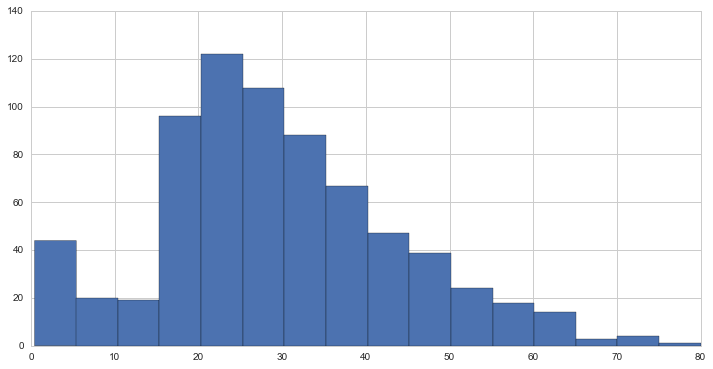

In [134]:
df['Age'].hist(bins=16)

### Siblings

In [135]:
df['SibSp'].value_counts(sort=False)

0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64

### Parents / childs

In [136]:
df['Parch'].value_counts(sort=False)

0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64

### Fare

In [137]:
df['Fare'].value_counts().head(20)

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
10.5000    24
7.9250     18
7.7750     16
26.5500    15
7.2292     15
0.0000     15
7.2500     13
7.8542     13
8.6625     13
7.2250     12
9.5000      9
16.1000     9
24.1500     8
15.5000     8
56.4958     7
Name: Fare, dtype: int64

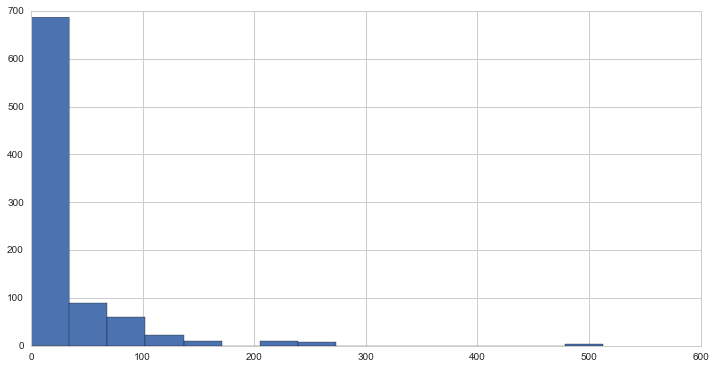

In [138]:
df['Fare'].hist(bins=15)

### Gender

In [139]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

### Ticket

In [140]:
df['Ticket'].value_counts()[:20]

CA. 2343        7
347082          7
1601            7
3101295         6
CA 2144         6
347088          6
S.O.C. 14879    5
382652          5
17421           4
W./C. 6608      4
113781          4
2666            4
19950           4
113760          4
349909          4
LINE            4
347077          4
PC 17757        4
4133            4
248727          3
Name: Ticket, dtype: int64

### Cabin

**Lots of missing values!!**

In [141]:
df['Cabin'].value_counts(dropna=False)[:20]

NaN            687
B96 B98          4
C23 C25 C27      4
G6               4
C22 C26          3
E101             3
D                3
F2               3
F33              3
E44              2
B77              2
C93              2
B20              2
C68              2
D33              2
D20              2
C78              2
B58 B60          2
E24              2
E33              2
Name: Cabin, dtype: int64

### Embarked

In [142]:
df['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

Large majority of people embarked in Southampton, so we'll put `'S'` for those two missing values:

In [143]:
df['Embarked'].fillna('S', inplace=True)

## Multivariate analysis

### Survival rate between sexes and classes

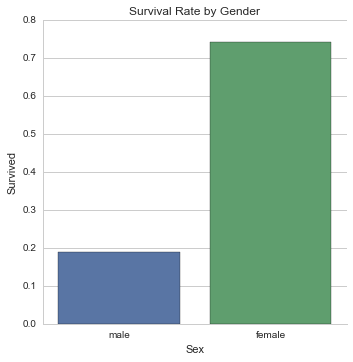

In [144]:
sns.factorplot(x='Sex', y='Survived', data=df, kind='bar', size=5, ci=None)
plt.title('Survival Rate by Gender')

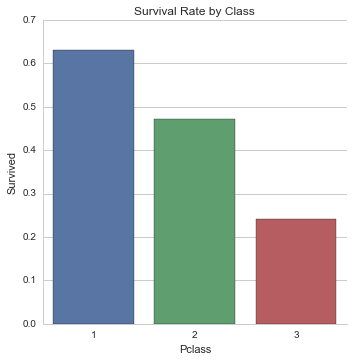

In [145]:
sns.factorplot(x='Pclass', y='Survived', data=df, kind='bar', size=5, ci=None)
plt.title('Survival Rate by Class')

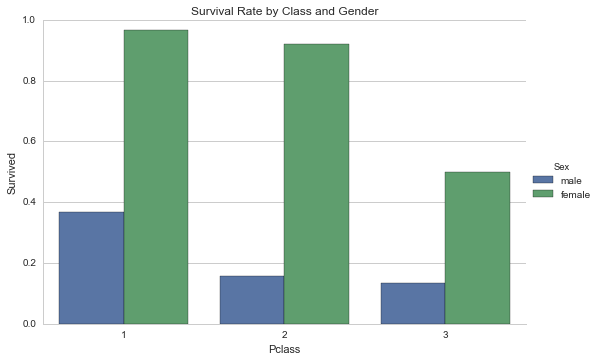

In [146]:
sns.factorplot(x='Pclass', y='Survived', hue='Sex', data=df, kind='bar', size=5, aspect=1.5, ci=None)
plt.title('Survival Rate by Class and Gender')

### Survival rate by age

Before we start dealing with the `age` column, we will fill missing values with the median value of each passengers group. The group is defined as people of the same *gender* in the same *class* having the same *title*.

In [147]:
median_ages = df.pivot_table('Age', index=['Title'], columns=['Sex', 'Pclass'], aggfunc='median')
median_ages

Sex     female              male            
Pclass       1     2     3     1     2     3
Title                                       
Master     NaN   NaN   NaN   4.0   1.0   4.0
Miss      30.0  24.0  18.0   NaN   NaN   NaN
Mr         NaN   NaN   NaN  40.0  31.0  26.0
Mrs       40.0  31.5  31.0   NaN   NaN   NaN
Officer   49.0   NaN   NaN  51.0  46.5   NaN
Royalty   40.5   NaN   NaN  40.0   NaN   NaN

In [148]:
def age_guesser(person):
    gender = person['Sex']
    persons_age = median_ages[gender].loc[person['Title'], person['Pclass']]
    return persons_age

unknown_age = df['Age'].isnull()
people_w_unknown_age = df.loc[unknown_age, ["Age", "Title", "Sex", "Pclass"]]

people_w_unknown_age['Age'] = people_w_unknown_age.apply(age_guesser, axis=1)
people_w_unknown_age.head()

Age Title     Sex  Pclass
PassengerId                            
6            26.0    Mr    male       3
18           31.0    Mr    male       2
20           31.0   Mrs  female       3
27           26.0    Mr    male       3
29           18.0  Miss  female       3

Above we can see that people were given the median age of their group.

Now we can create a new column `new_age` with ages for all passengers.

In [149]:
known_age = df['Age'].notnull()
people_w_known_age = df.loc[known_age, ["Age", "Title", "Sex", "Pclass"]]

df['new_age'] = pd.concat([people_w_known_age['Age'], people_w_unknown_age['Age']])
df.head(7)

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
6                   0       3   
7                   0       1   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   
6                                             Moran, Mr. James    male   NaN   
7                                      McCarthy, Mr. Timothy J    male  54.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked Title  \
PassengerId                                                                 
1                1      0         A/5 21171   7.2500   NaN        S    Mr   
2                1      0          PC 17599  71.2833   C85        C   Mrs   
3                0      0  STON/O2. 3101282   7.9250   NaN        S  Miss   
4                1      0            113803  53.1000  C123        S   Mrs   
5                0      0            373450   8.0500   NaN        S    Mr   
6                0      0            330877   8.4583   NaN        Q    Mr   
7                0      0             17463  51.8625   E46        S    Mr   

             new_age  
PassengerId           
1               22.0  
2               38.0  
3               26.0  
4               35.0  
5               35.0  
6               26.0  
7               54.0

Let's compare distributions of age densities in different classes, before and after filling the missing values.

(0, 0.05)

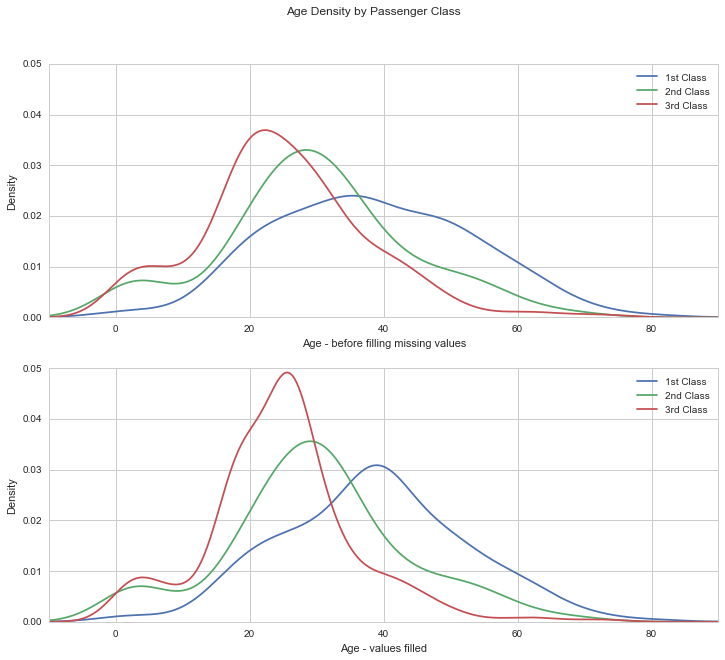

In [150]:
for pclass in [1, 2, 3]:
    plt.subplot(211)
    df[df['Pclass'] == pclass]['Age'].plot.kde(figsize=(12,10))
    plt.subplot(212)
    df[df['Pclass'] == pclass]['new_age'].plot.kde()
plt.suptitle('Age Density by Passenger Class', size=12)

plt.subplot(211)
plt.xlabel('Age - before filling missing values')
plt.legend(('1st Class', '2nd Class', '3rd Class'))
plt.xlim(-10,90)
plt.ylim(0, 0.05)

plt.subplot(212)
plt.xlabel('Age - values filled')
plt.legend(('1st Class', '2nd Class', '3rd Class'))
plt.xlim(-10,90)
plt.ylim(0, 0.05)

We'll use `new_age` for further analysis.

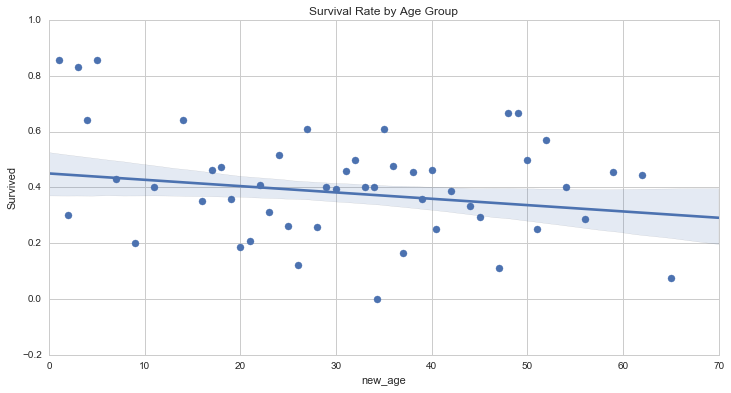

In [151]:
sns.regplot(x='new_age', y='Survived', data=df, x_bins=100, x_ci=None)
plt.xlim(0, None)
plt.title('Survival Rate by Age Group')

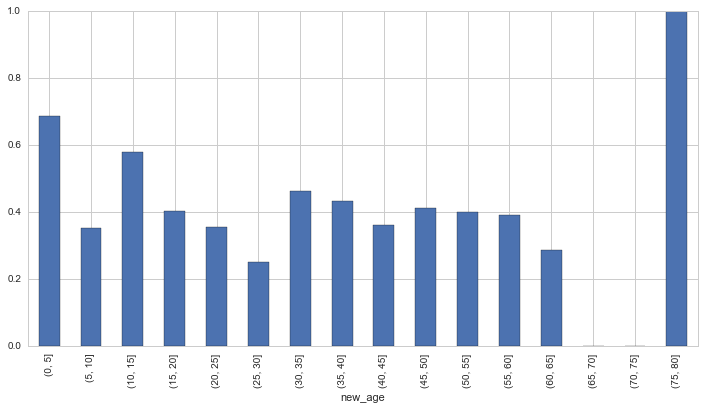

In [152]:
age_bins = np.arange(0, 81, 5)
age_groups = pd.cut(df['new_age'], age_bins)
grouped_ages = df.groupby(age_groups)

age_survival_1 = grouped_ages['Survived'].mean()

age_survival_1.plot(kind='bar')

### Family on Titanic

We'll combine two columns: `SibSp` and `Parch`, and categorize passengers by number of family members on Titanic.

In [153]:
df['family'] = df['SibSp'] + df['Parch']
df['family'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: family, dtype: int64

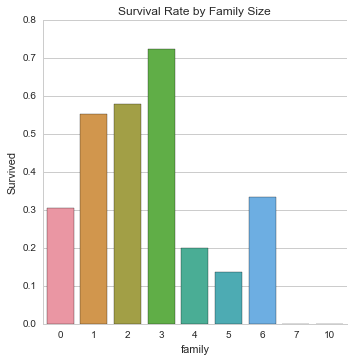

In [154]:
sns.factorplot(x='family', y='Survived', data=df, kind='bar', size=5, ci=None)
plt.title('Survival Rate by Family Size')

We'll create three values:
- 0 - for people with no family on Titanic
- 1 - for people with small family (1-2 members) on Titanic
- 2 - for people with large family (3+ members) on Titanic

In [155]:
df.loc[df['family'].isin([1, 2]), 'family'] = 1
df.loc[df['family'] > 2, 'family'] = 2

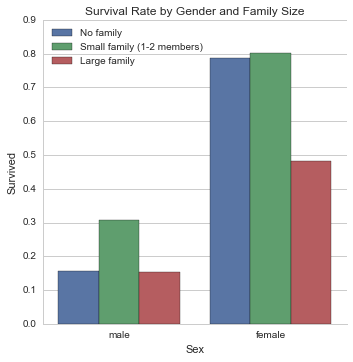

In [156]:
sns.factorplot(x='Sex', y='Survived', data=df, kind='bar', size=5, ci=None, hue='family', legend=False)
plt.legend(('No family', 'Small family (1-2 members)', 'Large family'), loc='best')
plt.title('Survival Rate by Gender and Family Size')

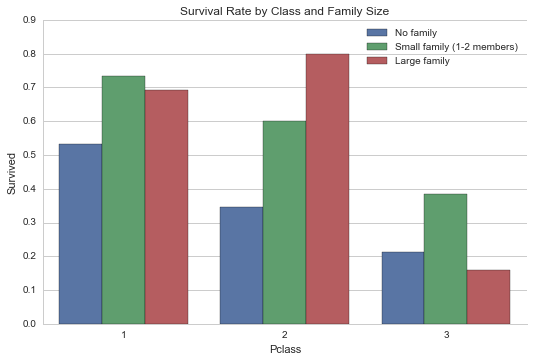

In [157]:
sns.factorplot(x='Pclass', y='Survived', data=df, kind='bar', size=5, aspect=1.5, ci=None, hue='family', legend=False)
plt.legend(('No family', 'Small family (1-2 members)', 'Large family'), loc='best')
plt.title('Survival Rate by Class and Family Size')

In [158]:
df.pivot_table('Survived', index=['Sex', 'Pclass'], columns=['family'], margins=True)

family                0         1         2       All
Sex    Pclass                                        
female 1       0.970588  1.000000  0.750000  0.968085
       2       0.906250  0.909091  1.000000  0.921053
       3       0.616667  0.529412  0.242424  0.500000
male   1       0.333333  0.404762  0.600000  0.368852
       2       0.097222  0.281250  0.250000  0.157407
       3       0.121212  0.245283  0.066667  0.135447
All            0.303538  0.562738  0.340659  0.383838

### Embarkment

- S - Southampton
- C - Cherbourg
- Q - Queenstown

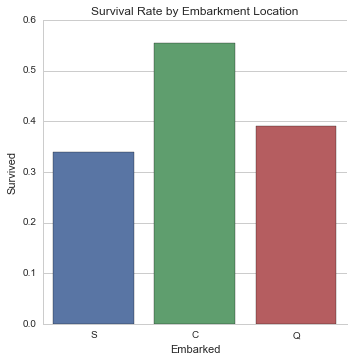

In [159]:
sns.factorplot(x='Embarked', y='Survived', data=df, kind='bar', size=5, ci=None)
plt.title('Survival Rate by Embarkment Location')

Why Cherbourg has higher survival rate? Let's explore passengers' gender and class for each embarkment location:

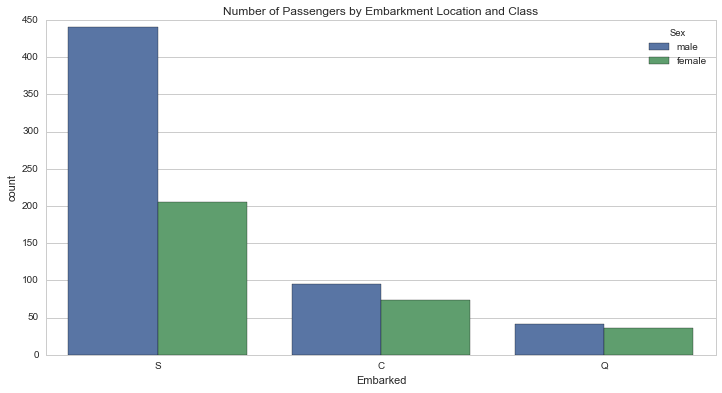

In [160]:
sns.countplot(x='Embarked', hue='Sex', data=df)
plt.title('Number of Passengers by Embarkment Location and Class')

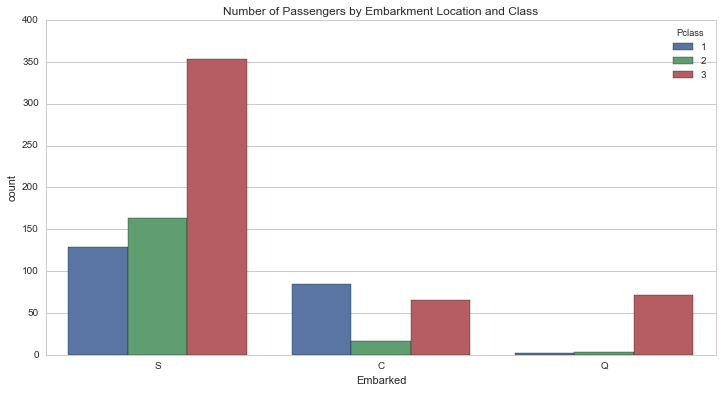

In [161]:
sns.countplot(x='Embarked', hue='Pclass', data=df)
plt.title('Number of Passengers by Embarkment Location and Class')

Passengers from Southampton were mostly male and mostly travelled in 3rd class, and we've seen earlier males in general had much lower survival rate than females.  
Majority of passengers from Queenstown were 3rd class passengers, and we've seen earlier that 3rd class passengers had lower survival rate than passengers in first two classes.

Passengers from Cherbourg had better both gender and class split, increasing their survival rates.

### Survival rate by title

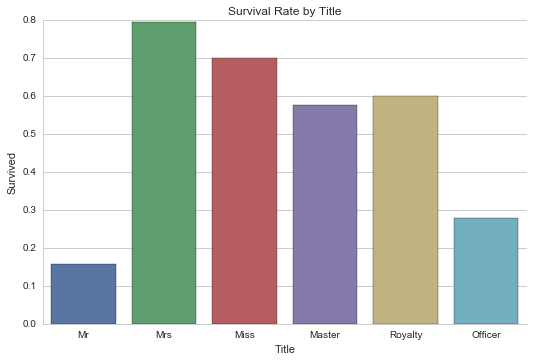

In [162]:
sns.factorplot(x='Title', y='Survived', data=df, kind='bar', size=5, aspect=1.5, ci=None)
plt.title('Survival Rate by Title')

### Survival rate by fare

[None, (1.0, 1000.0)]

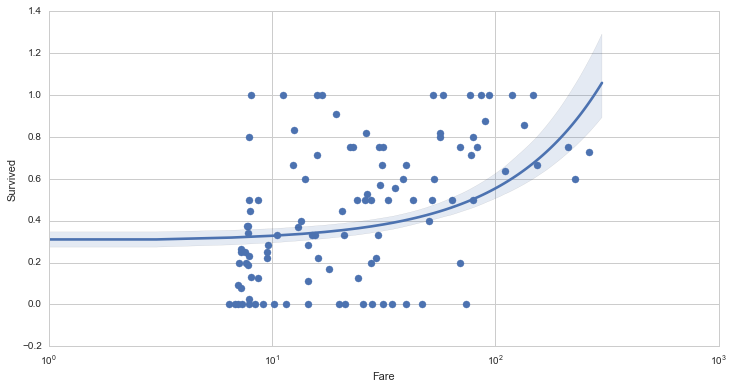

In [163]:
ax = sns.regplot(x='Fare', y='Survived', data=df, x_bins=150, x_ci=None)
ax.set(xscale="log", xlim=(1e0, 1e3))

The more you pay, the higher the chances. Probably has to do with different prices for different classes:

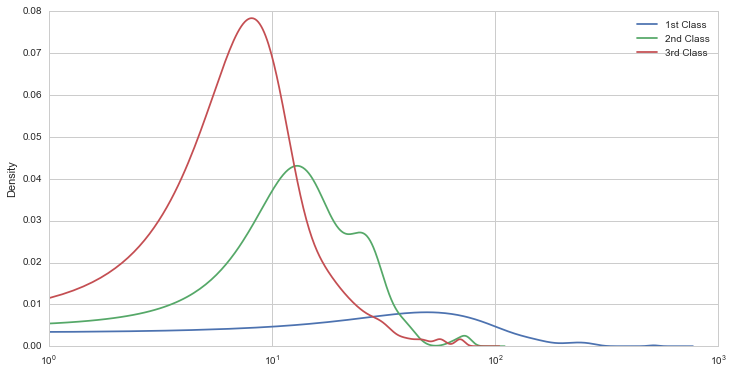

In [164]:
for pclass in [1, 2, 3]:
    ax = df[df['Pclass'] == pclass]['Fare'].plot.kde()
ax.set(xscale="log", xlim=(1e0, 1e3))
plt.legend(('1st Class', '2nd Class', '3rd Class'))

We'll create four classes of passengers based on `Fare` quartiles:

In [165]:
df['fare_class'] = pd.qcut(df['Fare'], 4, labels=range(4)).astype(int)
df['fare_class'].value_counts(sort=False)

0    223
1    224
2    222
3    222
Name: fare_class, dtype: int64

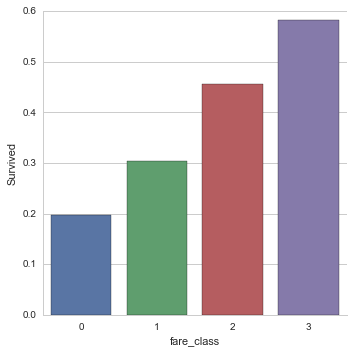

In [166]:
sns.factorplot(x='fare_class', y='Survived', data=df, kind='bar', size=5, ci=None)

# Tidying up and preparing data

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 15 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null object
Age           714 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Ticket        891 non-null object
Fare          891 non-null float64
Cabin         204 non-null object
Embarked      891 non-null object
Title         891 non-null object
new_age       891 non-null float64
family        891 non-null int64
fare_class    891 non-null int32
dtypes: float64(3), int32(1), int64(5), object(6)
memory usage: 107.9+ KB


We'll drop:

- `Name` - extracted titles, we don't need individual names
- `Age` - we created `new_age` where we filled all the missing values
- `SibSp` - we created `family` where we combined `SibSp` and `Parch`
- `Parch` - we created `family` where we combined `SibSp` and `Parch`
- `Ticket` - too many unique values, didn't extrract anything useful
- `Fare` - we created `fare_class` where we divided passengers into 4 grups depending on `Fare` value
- `Cabin` - too many missing values

In [168]:
not_needed = ['Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin']

df.drop(not_needed, axis=1, inplace=True)
df.head()

Survived  Pclass     Sex Embarked Title  new_age  family  \
PassengerId                                                             
1                   0       3    male        S    Mr     22.0       1   
2                   1       1  female        C   Mrs     38.0       1   
3                   1       3  female        S  Miss     26.0       0   
4                   1       1  female        S   Mrs     35.0       1   
5                   0       3    male        S    Mr     35.0       0   

             fare_class  
PassengerId              
1                     0  
2                     3  
3                     1  
4                     3  
5                     1

## Creating dummy values for categorical columns

`Sex` has only two values so we'll convert that in the new column `male` where 1 will represent males, and 0 will represent females:

In [169]:
df['male'] = (~df['Sex'].str.contains('fe')).astype(int)
df.drop('Sex', axis=1, inplace=True)

For other categorical columns, we'll create dummy values:

In [170]:
categorical = ['Pclass', 'Embarked', 'Title', 'family', 'fare_class']

for column in categorical:
    dummy = pd.get_dummies(df[column], prefix=column).astype(int)
    df = df.join(dummy)
    df.drop(column, axis=1, inplace=True)

df.head()

Survived  new_age  male  Pclass_1  Pclass_2  Pclass_3  \
PassengerId                                                          
1                   0     22.0     1         0         0         1   
2                   1     38.0     0         1         0         0   
3                   1     26.0     0         0         0         1   
4                   1     35.0     0         1         0         0   
5                   0     35.0     1         0         0         1   

             Embarked_C  Embarked_Q  Embarked_S  Title_Master      ...       \
PassengerId                                                        ...        
1                     0           0           1             0      ...        
2                     1           0           0             0      ...        
3                     0           0           1             0      ...        
4                     0           0           1             0      ...        
5                     0           0           1             0      ...        

             Title_Mrs  Title_Officer  Title_Royalty  family_0  family_1  \
PassengerId                                                                
1                    0              0              0         0         1   
2                    1              0              0         0         1   
3                    0              0              0         1         0   
4                    1              0              0         0         1   
5                    0              0              0         1         0   

             family_2  fare_class_0  fare_class_1  fare_class_2  fare_class_3  
PassengerId                                                                    
1                   0             1             0             0             0  
2                   0             0             0             0             1  
3                   0             0             1             0             0  
4                   0             0             0             0             1  
5                   0             0             1             0             0  

[5 rows x 22 columns]

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 22 columns):
Survived         891 non-null int64
new_age          891 non-null float64
male             891 non-null int32
Pclass_1         891 non-null int32
Pclass_2         891 non-null int32
Pclass_3         891 non-null int32
Embarked_C       891 non-null int32
Embarked_Q       891 non-null int32
Embarked_S       891 non-null int32
Title_Master     891 non-null int32
Title_Miss       891 non-null int32
Title_Mr         891 non-null int32
Title_Mrs        891 non-null int32
Title_Officer    891 non-null int32
Title_Royalty    891 non-null int32
family_0         891 non-null int32
family_1         891 non-null int32
family_2         891 non-null int32
fare_class_0     891 non-null int32
fare_class_1     891 non-null int32
fare_class_2     891 non-null int32
fare_class_3     891 non-null int32
dtypes: float64(1), int32(20), int64(1)
memory usage: 90.5 KB


# Test data

We'll explore test data set and do the same modification we did in the training set.

In [172]:
df_test = pd.read_csv('../#data-sets/titanic-test.csv', index_col='PassengerId')
df_test.head(12)

Pclass                                          Name     Sex  \
PassengerId                                                                 
892               3                              Kelly, Mr. James    male   
893               3              Wilkes, Mrs. James (Ellen Needs)  female   
894               2                     Myles, Mr. Thomas Francis    male   
895               3                              Wirz, Mr. Albert    male   
896               3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
897               3                    Svensson, Mr. Johan Cervin    male   
898               3                          Connolly, Miss. Kate  female   
899               2                  Caldwell, Mr. Albert Francis    male   
900               3     Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female   
901               3                       Davies, Mr. John Samuel    male   
902               3                              Ilieff, Mr. Ylio    male   
903               1                    Jones, Mr. Charles Cresson    male   

              Age  SibSp  Parch     Ticket     Fare Cabin Embarked  
PassengerId                                                         
892          34.5      0      0     330911   7.8292   NaN        Q  
893          47.0      1      0     363272   7.0000   NaN        S  
894          62.0      0      0     240276   9.6875   NaN        Q  
895          27.0      0      0     315154   8.6625   NaN        S  
896          22.0      1      1    3101298  12.2875   NaN        S  
897          14.0      0      0       7538   9.2250   NaN        S  
898          30.0      0      0     330972   7.6292   NaN        Q  
899          26.0      1      1     248738  29.0000   NaN        S  
900          18.0      0      0       2657   7.2292   NaN        C  
901          21.0      2      0  A/4 48871  24.1500   NaN        S  
902           NaN      0      0     349220   7.8958   NaN        S  
903          46.0      0      0        694  26.0000   NaN        S

In [173]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


## Creating new columns

Creating `Title` column:

In [174]:
df_test['Title'] = df_test['Name'].apply(lambda x: Title_Dictionary[x.split(',')[1].split('.')[0].strip()])

In [175]:
df_test.head()

Pclass                                          Name     Sex  \
PassengerId                                                                 
892               3                              Kelly, Mr. James    male   
893               3              Wilkes, Mrs. James (Ellen Needs)  female   
894               2                     Myles, Mr. Thomas Francis    male   
895               3                              Wirz, Mr. Albert    male   
896               3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

              Age  SibSp  Parch   Ticket     Fare Cabin Embarked Title  
PassengerId                                                             
892          34.5      0      0   330911   7.8292   NaN        Q    Mr  
893          47.0      1      0   363272   7.0000   NaN        S   Mrs  
894          62.0      0      0   240276   9.6875   NaN        Q    Mr  
895          27.0      0      0   315154   8.6625   NaN        S    Mr  
896          22.0      1      1  3101298  12.2875   NaN        S   Mrs

Creating `family` column:

In [176]:
df_test['family'] = df_test['SibSp'] + df_test['Parch']

df_test.loc[df_test['family'].isin([1, 2]), 'family'] = 1
df_test.loc[df_test['family'] > 2, 'family'] = 2

## Filling in the missing values

Fill in missing `age` values.

In [177]:
def age_guesser(person):
    gender = person['Sex']
    persons_age = median_ages[gender].loc[person['Title'], person['Pclass']]
    return persons_age


median_ages = df_test.pivot_table('Age', index=['Title'], columns=['Sex', 'Pclass'], aggfunc='median')

unknown_age = df_test['Age'].isnull()
people_w_unknown_age = df_test.loc[unknown_age, ["Age", "Title", "Sex", "Pclass"]]
people_w_unknown_age['Age'] = people_w_unknown_age.apply(age_guesser, axis=1)

known_age = df_test['Age'].notnull()
people_w_known_age = df_test.loc[known_age, ["Age", "Title", "Sex", "Pclass"]]

df_test['new_age'] = pd.concat([people_w_known_age['Age'], people_w_unknown_age['Age']])
df_test[7:12]

Pclass                                       Name     Sex   Age  \
PassengerId                                                                    
899               2               Caldwell, Mr. Albert Francis    male  26.0   
900               3  Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female  18.0   
901               3                    Davies, Mr. John Samuel    male  21.0   
902               3                           Ilieff, Mr. Ylio    male   NaN   
903               1                 Jones, Mr. Charles Cresson    male  46.0   

             SibSp  Parch     Ticket     Fare Cabin Embarked Title  family  \
PassengerId                                                                  
899              1      1     248738  29.0000   NaN        S    Mr       1   
900              0      0       2657   7.2292   NaN        C   Mrs       0   
901              2      0  A/4 48871  24.1500   NaN        S    Mr       1   
902              0      0     349220   7.8958   NaN        S    Mr       0   
903              0      0        694  26.0000   NaN        S    Mr       0   

             new_age  
PassengerId           
899             26.0  
900             18.0  
901             21.0  
902             25.0  
903             46.0

Fill missing `Fare` value and create `fare-class`:

In [178]:
df_test['Fare'].fillna(value=df_test['Fare'].mean(), inplace=True)
df_test['fare_class'] = pd.qcut(df_test['Fare'], 4, labels=range(4)).astype(int)

## Deleting unneeded columns

In [179]:
not_needed = ['Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin']

df_test.drop(not_needed, axis=1, inplace=True)

## Creating dummy values for categorical columns

In [180]:
df_test['male'] = (~df_test['Sex'].str.contains('fe')).astype(int)
df_test.drop('Sex', axis=1, inplace=True)

In [181]:
categorical = ['Pclass', 'Embarked', 'Title', 'family', 'fare_class']

for column in categorical:
    dummy = pd.get_dummies(df_test[column], prefix=column).astype(int)
    df_test = df_test.join(dummy)
    df_test.drop(column, axis=1, inplace=True)

df_test.head()

new_age  male  Pclass_1  Pclass_2  Pclass_3  Embarked_C  \
PassengerId                                                            
892             34.5     1         0         0         1           0   
893             47.0     0         0         0         1           0   
894             62.0     1         0         1         0           0   
895             27.0     1         0         0         1           0   
896             22.0     0         0         0         1           0   

             Embarked_Q  Embarked_S  Title_Master  Title_Miss      ...       \
PassengerId                                                        ...        
892                   1           0             0           0      ...        
893                   0           1             0           0      ...        
894                   1           0             0           0      ...        
895                   0           1             0           0      ...        
896                   0           1             0           0      ...        

             Title_Mrs  Title_Officer  Title_Royalty  family_0  family_1  \
PassengerId                                                                
892                  0              0              0         1         0   
893                  1              0              0         0         1   
894                  0              0              0         1         0   
895                  0              0              0         1         0   
896                  1              0              0         0         1   

             family_2  fare_class_0  fare_class_1  fare_class_2  fare_class_3  
PassengerId                                                                    
892                 0             1             0             0             0  
893                 0             1             0             0             0  
894                 0             0             1             0             0  
895                 0             0             1             0             0  
896                 0             0             1             0             0  

[5 rows x 21 columns]

In [182]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 21 columns):
new_age          418 non-null float64
male             418 non-null int32
Pclass_1         418 non-null int32
Pclass_2         418 non-null int32
Pclass_3         418 non-null int32
Embarked_C       418 non-null int32
Embarked_Q       418 non-null int32
Embarked_S       418 non-null int32
Title_Master     418 non-null int32
Title_Miss       418 non-null int32
Title_Mr         418 non-null int32
Title_Mrs        418 non-null int32
Title_Officer    418 non-null int32
Title_Royalty    418 non-null int32
family_0         418 non-null int32
family_1         418 non-null int32
family_2         418 non-null int32
fare_class_0     418 non-null int32
fare_class_1     418 non-null int32
fare_class_2     418 non-null int32
fare_class_3     418 non-null int32
dtypes: float64(1), int32(20)
memory usage: 39.2 KB


# Training

In [183]:
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, VotingClassifier)
from sklearn.grid_search import GridSearchCV

In [184]:
X = df.drop('Survived', 1)
y = df['Survived']

In [185]:
seed = 2016
num_folds = 10
num_instances = len(X)
jobs = -1

scoring = 'accuracy'

kfold = KFold(n=num_instances, n_folds=num_folds, random_state=seed)

## Models

We'll test different models:
- basic models:
    - logistic regression
    - k-nearest neighbors
    - gaussian naive bayes
    - decision tree
- ensembles:
    - bagged decision tree
    - random forest
- boosting:
    - ada boost
    - gradient boost

In [186]:
models = [('lr', LogisticRegression()), 
          ('knn', KNeighborsClassifier()),
          ('nb', GaussianNB()),
          ('cart', DecisionTreeClassifier(random_state=seed)),
          ('bag', BaggingClassifier(random_state=seed)),
          ('rf', RandomForestClassifier(random_state=seed)), 
          ('ada', AdaBoostClassifier()),
          ('gbm', GradientBoostingClassifier())]

In [187]:
for name, model in models:
    result = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    print("{0}:\t ({1:.4f}) +/- ({2:.4f})".format(name, result.mean(), result.std()))

lr:	 (0.8227) +/- (0.0383)
knn:	 (0.7857) +/- (0.0358)
nb:	 (0.7621) +/- (0.0421)
cart:	 (0.7869) +/- (0.0422)
bag:	 (0.7980) +/- (0.0368)
rf:	 (0.7789) +/- (0.0332)
ada:	 (0.8092) +/- (0.0297)
gbm:	 (0.8272) +/- (0.0393)


## Hyperparameter tuning

We'll use `GridSearchCV` to find the best parameters for each algorithm that we used above.

Best scores and parameters for each algorithms will be saved in these variables:

In [63]:
lr_best = (0, None)
knn_best = (0, None)
cart_best = (0, None)
bag_best = (0, None)
rf_best = (0, None)
ada_best = (0, None)
gbm_best = (0, None)

### Logistic regression

In [65]:
lr_grid = GridSearchCV(estimator = LogisticRegression(random_state=seed),
                       param_grid = {'penalty': ['l1', 'l2'], 
                                     'C': [0.001, 0.01, 0.1, 1, 10, 100]}, 
                       cv = kfold, 
                       scoring = scoring)

lr_grid.fit(X, y)

lr_best = max(lr_best, (lr_grid.best_score_, lr_grid.best_params_))

lr_grid.grid_scores_.sort(key=lambda x: x[1], reverse=True)
lr_grid.grid_scores_

[mean: 0.82379, std: 0.03679, params: {'C': 1, 'penalty': 'l1'},
 mean: 0.82267, std: 0.03832, params: {'C': 1, 'penalty': 'l2'},
 mean: 0.82267, std: 0.04016, params: {'C': 10, 'penalty': 'l1'},
 mean: 0.82155, std: 0.03910, params: {'C': 10, 'penalty': 'l2'},
 mean: 0.82155, std: 0.03878, params: {'C': 100, 'penalty': 'l1'},
 mean: 0.82155, std: 0.03878, params: {'C': 100, 'penalty': 'l2'},
 mean: 0.82043, std: 0.03300, params: {'C': 0.1, 'penalty': 'l2'},
 mean: 0.79237, std: 0.03825, params: {'C': 0.1, 'penalty': 'l1'},
 mean: 0.79012, std: 0.03838, params: {'C': 0.01, 'penalty': 'l2'},
 mean: 0.62177, std: 0.07373, params: {'C': 0.001, 'penalty': 'l2'},
 mean: 0.61616, std: 0.07049, params: {'C': 0.001, 'penalty': 'l1'},
 mean: 0.61616, std: 0.07049, params: {'C': 0.01, 'penalty': 'l1'}]

Let's try different solvers - they work only with L2 penalty:

In [67]:
lr_grid = GridSearchCV(estimator = LogisticRegression(random_state=seed),
                       param_grid = {'penalty': ['l2'], 
                                     'solver': ['newton-cg', 'lbfgs', 'liblinear'],
                                     'C': [1, 2, 5, 10]}, 
                       cv = kfold, 
                       scoring = scoring)

lr_grid.fit(X, y)

lr_best = max(lr_best, (lr_grid.best_score_, lr_grid.best_params_))

lr_grid.grid_scores_.sort(key=lambda x: x[1], reverse=True)
lr_grid.grid_scores_

[mean: 0.82267, std: 0.03889, params: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'},
 mean: 0.82267, std: 0.03832, params: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'},
 mean: 0.82155, std: 0.03943, params: {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'},
 mean: 0.82155, std: 0.03910, params: {'C': 2, 'penalty': 'l2', 'solver': 'liblinear'},
 mean: 0.82155, std: 0.03910, params: {'C': 5, 'penalty': 'l2', 'solver': 'newton-cg'},
 mean: 0.82155, std: 0.03910, params: {'C': 5, 'penalty': 'l2', 'solver': 'lbfgs'},
 mean: 0.82155, std: 0.03910, params: {'C': 5, 'penalty': 'l2', 'solver': 'liblinear'},
 mean: 0.82155, std: 0.03910, params: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'},
 mean: 0.82155, std: 0.03910, params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'},
 mean: 0.82155, std: 0.03910, params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'},
 mean: 0.82043, std: 0.04024, params: {'C': 2, 'penalty': 'l2', 'solver': 'newton-cg'},
 mean: 0.82043, std: 0.04268, params: {'C

Default solver (liblinear) seems like the best choice - let's tune it a bit more:

In [68]:
lr_grid = GridSearchCV(estimator = LogisticRegression(random_state=seed),
                       param_grid = {'penalty': ['l1', 'l2'], 
                                     'C': [1, 2, 3, 4, 5, 10]}, 
                       cv = kfold, 
                       scoring = scoring)

lr_grid.fit(X, y)

lr_best = max(lr_best, (lr_grid.best_score_, lr_grid.best_params_))

lr_grid.grid_scores_.sort(key=lambda x: x[1], reverse=True)
lr_grid.grid_scores_

[mean: 0.82492, std: 0.04067, params: {'C': 2, 'penalty': 'l1'},
 mean: 0.82492, std: 0.04067, params: {'C': 3, 'penalty': 'l1'},
 mean: 0.82379, std: 0.03679, params: {'C': 1, 'penalty': 'l1'},
 mean: 0.82379, std: 0.04177, params: {'C': 4, 'penalty': 'l1'},
 mean: 0.82267, std: 0.03832, params: {'C': 1, 'penalty': 'l2'},
 mean: 0.82267, std: 0.04079, params: {'C': 3, 'penalty': 'l2'},
 mean: 0.82267, std: 0.04079, params: {'C': 4, 'penalty': 'l2'},
 mean: 0.82267, std: 0.04016, params: {'C': 5, 'penalty': 'l1'},
 mean: 0.82267, std: 0.04016, params: {'C': 10, 'penalty': 'l1'},
 mean: 0.82155, std: 0.03910, params: {'C': 2, 'penalty': 'l2'},
 mean: 0.82155, std: 0.03910, params: {'C': 5, 'penalty': 'l2'},
 mean: 0.82155, std: 0.03910, params: {'C': 10, 'penalty': 'l2'}]

In [69]:
lr_best

(0.82491582491582494, {'C': 2, 'penalty': 'l1'})

### K-nearest neighbors

In [70]:
knn_grid = GridSearchCV(estimator = KNeighborsClassifier(),
                        param_grid = {'n_neighbors': [1, 5, 10, 25, 50],
                                      'weights': ['uniform', 'distance'],
                                      'algorithm': ['ball_tree', 'kd_tree'],
                                      'leaf_size': [5, 15, 30, 50], 
                                      'p': [1, 2]}, 
                        cv = kfold, 
                        scoring = scoring)

knn_grid.fit(X, y)

knn_best = max(knn_best, (knn_grid.best_score_, knn_grid.best_params_))

knn_grid.grid_scores_.sort(key=lambda x: x[1], reverse=True)
knn_grid.grid_scores_[:15]

[mean: 0.80808, std: 0.04322, params: {'n_neighbors': 10, 'algorithm': 'kd_tree', 'leaf_size': 5, 'weights': 'distance', 'p': 1},
 mean: 0.80584, std: 0.04163, params: {'n_neighbors': 10, 'algorithm': 'ball_tree', 'leaf_size': 5, 'weights': 'distance', 'p': 1},
 mean: 0.80359, std: 0.04170, params: {'n_neighbors': 10, 'algorithm': 'ball_tree', 'leaf_size': 30, 'weights': 'distance', 'p': 1},
 mean: 0.80359, std: 0.04170, params: {'n_neighbors': 10, 'algorithm': 'ball_tree', 'leaf_size': 50, 'weights': 'distance', 'p': 1},
 mean: 0.80359, std: 0.03559, params: {'n_neighbors': 10, 'algorithm': 'kd_tree', 'leaf_size': 15, 'weights': 'distance', 'p': 1},
 mean: 0.80247, std: 0.03414, params: {'n_neighbors': 5, 'algorithm': 'kd_tree', 'leaf_size': 15, 'weights': 'distance', 'p': 1},
 mean: 0.80247, std: 0.02991, params: {'n_neighbors': 5, 'algorithm': 'kd_tree', 'leaf_size': 30, 'weights': 'distance', 'p': 1},
 mean: 0.80247, std: 0.03789, params: {'n_neighbors': 10, 'algorithm': 'kd_tree',

In [71]:
knn_grid = GridSearchCV(estimator = KNeighborsClassifier(),
                        param_grid = {'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20],
                                      'weights': ['distance'],
                                      'algorithm': ['ball_tree', 'kd_tree'],
                                      'leaf_size': [5, 15, 30, 50], 
                                      'p': [1]}, 
                        cv = kfold, 
                        scoring = scoring)

knn_grid.fit(X, y)

knn_best = max(knn_best, (knn_grid.best_score_, knn_grid.best_params_))

knn_grid.grid_scores_.sort(key=lambda x: x[1], reverse=True)
knn_grid.grid_scores_[:15]

[mean: 0.80808, std: 0.04322, params: {'n_neighbors': 10, 'algorithm': 'kd_tree', 'leaf_size': 5, 'weights': 'distance', 'p': 1},
 mean: 0.80808, std: 0.03668, params: {'n_neighbors': 11, 'algorithm': 'kd_tree', 'leaf_size': 5, 'weights': 'distance', 'p': 1},
 mean: 0.80696, std: 0.04419, params: {'n_neighbors': 12, 'algorithm': 'ball_tree', 'leaf_size': 5, 'weights': 'distance', 'p': 1},
 mean: 0.80584, std: 0.04163, params: {'n_neighbors': 10, 'algorithm': 'ball_tree', 'leaf_size': 5, 'weights': 'distance', 'p': 1},
 mean: 0.80584, std: 0.03690, params: {'n_neighbors': 12, 'algorithm': 'kd_tree', 'leaf_size': 5, 'weights': 'distance', 'p': 1},
 mean: 0.80471, std: 0.04545, params: {'n_neighbors': 11, 'algorithm': 'ball_tree', 'leaf_size': 5, 'weights': 'distance', 'p': 1},
 mean: 0.80471, std: 0.03222, params: {'n_neighbors': 8, 'algorithm': 'ball_tree', 'leaf_size': 15, 'weights': 'distance', 'p': 1},
 mean: 0.80471, std: 0.03960, params: {'n_neighbors': 11, 'algorithm': 'kd_tree', 

In [72]:
knn_grid = GridSearchCV(estimator = KNeighborsClassifier(),
                        param_grid = {'n_neighbors': [8, 10, 11, 12],
                                      'weights': ['distance', ],
                                      'algorithm': ['ball_tree', 'kd_tree'],
                                      'leaf_size': list(range(1, 11)) + [15, 30], 
                                      'p': [1]}, 
                        cv = kfold, 
                        scoring = scoring)

knn_grid.fit(X, y)

# knn_best = max(knn_best, (knn_grid.best_score_, knn_grid.best_params_))

knn_grid.grid_scores_.sort(key=lambda x: x[1], reverse=True)
knn_grid.grid_scores_[:15]

[mean: 0.80808, std: 0.03901, params: {'n_neighbors': 10, 'algorithm': 'ball_tree', 'leaf_size': 7, 'weights': 'distance', 'p': 1},
 mean: 0.80808, std: 0.03901, params: {'n_neighbors': 10, 'algorithm': 'ball_tree', 'leaf_size': 8, 'weights': 'distance', 'p': 1},
 mean: 0.80808, std: 0.03901, params: {'n_neighbors': 10, 'algorithm': 'ball_tree', 'leaf_size': 9, 'weights': 'distance', 'p': 1},
 mean: 0.80808, std: 0.03901, params: {'n_neighbors': 10, 'algorithm': 'ball_tree', 'leaf_size': 10, 'weights': 'distance', 'p': 1},
 mean: 0.80808, std: 0.04173, params: {'n_neighbors': 10, 'algorithm': 'kd_tree', 'leaf_size': 1, 'weights': 'distance', 'p': 1},
 mean: 0.80808, std: 0.04322, params: {'n_neighbors': 10, 'algorithm': 'kd_tree', 'leaf_size': 4, 'weights': 'distance', 'p': 1},
 mean: 0.80808, std: 0.03668, params: {'n_neighbors': 11, 'algorithm': 'kd_tree', 'leaf_size': 4, 'weights': 'distance', 'p': 1},
 mean: 0.80808, std: 0.04322, params: {'n_neighbors': 10, 'algorithm': 'kd_tree',

In [73]:
knn_grid = GridSearchCV(estimator = KNeighborsClassifier(),
                        param_grid = {'n_neighbors': [8, 10, 11, 12],
                                      'weights': ['distance'],
                                      'algorithm': ['ball_tree', 'kd_tree'],
                                      'leaf_size': list(range(7,15)), 
                                      'p': [1]}, 
                        cv = kfold, 
                        scoring = scoring)

knn_grid.fit(X, y)

knn_best = (knn_grid.best_score_, knn_grid.best_params_)

knn_grid.grid_scores_.sort(key=lambda x: x[1], reverse=True)
knn_grid.grid_scores_[:15]

[mean: 0.80808, std: 0.03901, params: {'n_neighbors': 10, 'algorithm': 'ball_tree', 'leaf_size': 7, 'weights': 'distance', 'p': 1},
 mean: 0.80808, std: 0.03901, params: {'n_neighbors': 10, 'algorithm': 'ball_tree', 'leaf_size': 8, 'weights': 'distance', 'p': 1},
 mean: 0.80808, std: 0.03901, params: {'n_neighbors': 10, 'algorithm': 'ball_tree', 'leaf_size': 9, 'weights': 'distance', 'p': 1},
 mean: 0.80808, std: 0.03901, params: {'n_neighbors': 10, 'algorithm': 'ball_tree', 'leaf_size': 10, 'weights': 'distance', 'p': 1},
 mean: 0.80808, std: 0.03901, params: {'n_neighbors': 10, 'algorithm': 'ball_tree', 'leaf_size': 11, 'weights': 'distance', 'p': 1},
 mean: 0.80808, std: 0.03901, params: {'n_neighbors': 10, 'algorithm': 'ball_tree', 'leaf_size': 12, 'weights': 'distance', 'p': 1},
 mean: 0.80584, std: 0.03341, params: {'n_neighbors': 8, 'algorithm': 'kd_tree', 'leaf_size': 7, 'weights': 'distance', 'p': 1},
 mean: 0.80584, std: 0.03912, params: {'n_neighbors': 11, 'algorithm': 'kd_t

In [74]:
knn_best

(0.80808080808080807,
 {'algorithm': 'ball_tree',
  'leaf_size': 7,
  'n_neighbors': 10,
  'p': 1,
  'weights': 'distance'})

### Decision Tree Classifier

In [75]:
cart_grid = GridSearchCV(estimator = DecisionTreeClassifier(random_state=seed),
                         param_grid = {'criterion': ['gini', 'entropy'],
                                       'splitter': ['best', 'random'], 
                                       'max_features': [None, 'sqrt', 'log2'],
                                       'max_depth': [None, 2, 5, 10, 20]}, 
                         cv = kfold, 
                         scoring = scoring)

cart_grid.fit(X, y)

cart_best = max(cart_best, (cart_grid.best_score_, cart_grid.best_params_))

cart_grid.grid_scores_.sort(key=lambda x: x[1], reverse=True)
cart_grid.grid_scores_[:15]

[mean: 0.81481, std: 0.04834, params: {'max_features': 'sqrt', 'max_depth': 5, 'criterion': 'gini', 'splitter': 'best'},
 mean: 0.81481, std: 0.04834, params: {'max_features': 'log2', 'max_depth': 5, 'criterion': 'gini', 'splitter': 'best'},
 mean: 0.81369, std: 0.03857, params: {'max_features': 'sqrt', 'max_depth': 5, 'criterion': 'entropy', 'splitter': 'best'},
 mean: 0.81369, std: 0.03857, params: {'max_features': 'log2', 'max_depth': 5, 'criterion': 'entropy', 'splitter': 'best'},
 mean: 0.81257, std: 0.02516, params: {'max_features': None, 'max_depth': 5, 'criterion': 'entropy', 'splitter': 'random'},
 mean: 0.81033, std: 0.02909, params: {'max_features': None, 'max_depth': 5, 'criterion': 'gini', 'splitter': 'best'},
 mean: 0.80808, std: 0.03540, params: {'max_features': None, 'max_depth': 5, 'criterion': 'gini', 'splitter': 'random'},
 mean: 0.80471, std: 0.03696, params: {'max_features': None, 'max_depth': 10, 'criterion': 'entropy', 'splitter': 'random'},
 mean: 0.80359, std: 

In [76]:
cart_grid = GridSearchCV(estimator = DecisionTreeClassifier(random_state=seed),
                         param_grid = {'criterion': ['gini', 'entropy'],
                                       'splitter': ['best'], 
                                       'max_features': ['sqrt', 'log2'],
                                       'max_depth': [None] + list(range(2, 11))}, 
                         cv = kfold, 
                         scoring = scoring)

cart_grid.fit(X, y)

cart_best = max(cart_best, (cart_grid.best_score_, cart_grid.best_params_))

cart_grid.grid_scores_.sort(key=lambda x: x[1], reverse=True)
cart_grid.grid_scores_[:15]

[mean: 0.81818, std: 0.03402, params: {'max_features': 'sqrt', 'max_depth': 4, 'criterion': 'entropy', 'splitter': 'best'},
 mean: 0.81818, std: 0.03402, params: {'max_features': 'log2', 'max_depth': 4, 'criterion': 'entropy', 'splitter': 'best'},
 mean: 0.81481, std: 0.04834, params: {'max_features': 'sqrt', 'max_depth': 5, 'criterion': 'gini', 'splitter': 'best'},
 mean: 0.81481, std: 0.04834, params: {'max_features': 'log2', 'max_depth': 5, 'criterion': 'gini', 'splitter': 'best'},
 mean: 0.81369, std: 0.03857, params: {'max_features': 'sqrt', 'max_depth': 5, 'criterion': 'entropy', 'splitter': 'best'},
 mean: 0.81369, std: 0.03857, params: {'max_features': 'log2', 'max_depth': 5, 'criterion': 'entropy', 'splitter': 'best'},
 mean: 0.80920, std: 0.03494, params: {'max_features': 'sqrt', 'max_depth': 6, 'criterion': 'gini', 'splitter': 'best'},
 mean: 0.80920, std: 0.03494, params: {'max_features': 'log2', 'max_depth': 6, 'criterion': 'gini', 'splitter': 'best'},
 mean: 0.80920, std:

In [77]:
cart_best

(0.81818181818181823,
 {'criterion': 'entropy',
  'max_depth': 4,
  'max_features': 'sqrt',
  'splitter': 'best'})

### Bagging Classifier

In [78]:
bag_grid = GridSearchCV(estimator = BaggingClassifier(random_state=seed),
                         param_grid = {'n_estimators': [2, 10, 50],
                                       'max_samples': [1, 2, 3, 4, 5],
                                       'max_features': [1, 2, 3, 4, 5]}, 
                         cv = kfold, 
                         scoring = scoring)

bag_grid.fit(X, y)

bag_best = max(bag_best, (bag_grid.best_score_, bag_grid.best_params_))

bag_grid.grid_scores_.sort(key=lambda x: x[1], reverse=True)
bag_grid.grid_scores_[:15]

[mean: 0.75421, std: 0.04548, params: {'max_features': 5, 'max_samples': 5, 'n_estimators': 50},
 mean: 0.74972, std: 0.04785, params: {'max_features': 5, 'max_samples': 3, 'n_estimators': 50},
 mean: 0.73513, std: 0.05095, params: {'max_features': 5, 'max_samples': 4, 'n_estimators': 50},
 mean: 0.73064, std: 0.03934, params: {'max_features': 3, 'max_samples': 5, 'n_estimators': 50},
 mean: 0.72278, std: 0.02675, params: {'max_features': 4, 'max_samples': 5, 'n_estimators': 50},
 mean: 0.71829, std: 0.05620, params: {'max_features': 5, 'max_samples': 2, 'n_estimators': 50},
 mean: 0.70370, std: 0.05073, params: {'max_features': 3, 'max_samples': 4, 'n_estimators': 50},
 mean: 0.70258, std: 0.02862, params: {'max_features': 4, 'max_samples': 4, 'n_estimators': 50},
 mean: 0.69809, std: 0.03498, params: {'max_features': 4, 'max_samples': 3, 'n_estimators': 50},
 mean: 0.66891, std: 0.06320, params: {'max_features': 2, 'max_samples': 5, 'n_estimators': 50},
 mean: 0.64310, std: 0.05426, 

In [79]:
bag_grid = GridSearchCV(estimator = BaggingClassifier(random_state=seed),
                         param_grid = {'n_estimators': [10, 20, 30, 40, 50, 60, 70],
                                       'max_samples': [3, 4, 5, 6, 7, 8, 9, 10],
                                       'max_features': [3, 4, 5, 6, 7, 8, 9, 10]}, 
                         cv = kfold, 
                         scoring = scoring)

bag_grid.fit(X, y)

bag_best = max(bag_best, (bag_grid.best_score_, bag_grid.best_params_))

bag_grid.grid_scores_.sort(key=lambda x: x[1], reverse=True)
bag_grid.grid_scores_[:15]

[mean: 0.80471, std: 0.04307, params: {'max_features': 9, 'max_samples': 10, 'n_estimators': 70},
 mean: 0.79910, std: 0.04936, params: {'max_features': 9, 'max_samples': 10, 'n_estimators': 60},
 mean: 0.79798, std: 0.04662, params: {'max_features': 8, 'max_samples': 10, 'n_estimators': 60},
 mean: 0.79574, std: 0.05105, params: {'max_features': 8, 'max_samples': 10, 'n_estimators': 70},
 mean: 0.79349, std: 0.03508, params: {'max_features': 9, 'max_samples': 9, 'n_estimators': 60},
 mean: 0.79349, std: 0.04400, params: {'max_features': 10, 'max_samples': 10, 'n_estimators': 40},
 mean: 0.79237, std: 0.04972, params: {'max_features': 9, 'max_samples': 8, 'n_estimators': 70},
 mean: 0.79237, std: 0.04587, params: {'max_features': 9, 'max_samples': 9, 'n_estimators': 70},
 mean: 0.79125, std: 0.04207, params: {'max_features': 8, 'max_samples': 9, 'n_estimators': 60},
 mean: 0.79125, std: 0.04076, params: {'max_features': 10, 'max_samples': 10, 'n_estimators': 50},
 mean: 0.79125, std: 0

In [80]:
bag_grid = GridSearchCV(estimator = BaggingClassifier(random_state=seed),
                         param_grid = {'n_estimators': [50, 60, 70, 80, 90, 100],
                                       'max_samples': [9, 10, 11, 12, 13, 14, 15],
                                       'max_features': [8, 9, 10, 11, 12]}, 
                         cv = kfold, 
                         scoring = scoring)

bag_grid.fit(X, y)

bag_best = max(bag_best, (bag_grid.best_score_, bag_grid.best_params_))

bag_grid.grid_scores_.sort(key=lambda x: x[1], reverse=True)
bag_grid.grid_scores_[:15]

[mean: 0.81930, std: 0.03934, params: {'max_features': 9, 'max_samples': 11, 'n_estimators': 100},
 mean: 0.81818, std: 0.04402, params: {'max_features': 8, 'max_samples': 13, 'n_estimators': 100},
 mean: 0.81818, std: 0.04065, params: {'max_features': 9, 'max_samples': 10, 'n_estimators': 100},
 mean: 0.81706, std: 0.03515, params: {'max_features': 9, 'max_samples': 11, 'n_estimators': 90},
 mean: 0.81594, std: 0.04164, params: {'max_features': 9, 'max_samples': 13, 'n_estimators': 70},
 mean: 0.81594, std: 0.03985, params: {'max_features': 9, 'max_samples': 13, 'n_estimators': 80},
 mean: 0.81481, std: 0.02751, params: {'max_features': 9, 'max_samples': 12, 'n_estimators': 100},
 mean: 0.81481, std: 0.04492, params: {'max_features': 9, 'max_samples': 13, 'n_estimators': 50},
 mean: 0.81481, std: 0.02937, params: {'max_features': 9, 'max_samples': 13, 'n_estimators': 100},
 mean: 0.81369, std: 0.03551, params: {'max_features': 8, 'max_samples': 14, 'n_estimators': 100},
 mean: 0.81369

In [81]:
bag_best

(0.81930415263748602,
 {'max_features': 9, 'max_samples': 11, 'n_estimators': 100})

### Random Forest

In [82]:
rf_grid = GridSearchCV(estimator = RandomForestClassifier(warm_start=True, random_state=seed), 
                       param_grid = {'n_estimators': [10, 20, 50, 100],
                                     'criterion': ['entropy', 'gini'], 
                                     'max_features': [None, 'auto', 'log2'], 
                                     'max_depth': [None, 3, 4, 5, 10]}, 
                       cv = kfold, 
                       scoring = scoring)

rf_grid.fit(X, y)

rf_best = max(rf_best, (rf_grid.best_score_, rf_grid.best_params_))

rf_grid.grid_scores_.sort(key=lambda x: x[1], reverse=True)
rf_grid.grid_scores_[:15]

[mean: 0.82828, std: 0.03966, params: {'max_features': 'auto', 'n_estimators': 100, 'max_depth': 4, 'criterion': 'entropy'},
 mean: 0.82828, std: 0.03966, params: {'max_features': 'log2', 'n_estimators': 100, 'max_depth': 4, 'criterion': 'entropy'},
 mean: 0.82828, std: 0.03966, params: {'max_features': 'auto', 'n_estimators': 100, 'max_depth': 4, 'criterion': 'gini'},
 mean: 0.82828, std: 0.03966, params: {'max_features': 'log2', 'n_estimators': 100, 'max_depth': 4, 'criterion': 'gini'},
 mean: 0.82716, std: 0.03915, params: {'max_features': 'auto', 'n_estimators': 50, 'max_depth': 4, 'criterion': 'gini'},
 mean: 0.82716, std: 0.03915, params: {'max_features': 'log2', 'n_estimators': 50, 'max_depth': 4, 'criterion': 'gini'},
 mean: 0.82716, std: 0.03621, params: {'max_features': None, 'n_estimators': 100, 'max_depth': 5, 'criterion': 'gini'},
 mean: 0.82604, std: 0.04190, params: {'max_features': 'auto', 'n_estimators': 100, 'max_depth': 5, 'criterion': 'entropy'},
 mean: 0.82604, std

In [84]:
rf_grid = GridSearchCV(estimator = RandomForestClassifier(warm_start=True, random_state=seed), 
                       param_grid = {'n_estimators': [50, 100],
                                     'criterion': ['entropy', 'gini'], 
                                     'max_features': ['sqrt', 'log2'], 
                                     'max_depth': [4, 5, 6, 7]}, 
                       cv = kfold, 
                       scoring = scoring)

rf_grid.fit(X, y)

# rf_best = max(rf_best, (rf_grid.best_score_, rf_grid.best_params_))

rf_grid.grid_scores_.sort(key=lambda x: x[1], reverse=True)
rf_grid.grid_scores_[:15]

[mean: 0.82828, std: 0.03966, params: {'max_features': 'sqrt', 'n_estimators': 100, 'max_depth': 4, 'criterion': 'entropy'},
 mean: 0.82828, std: 0.03966, params: {'max_features': 'log2', 'n_estimators': 100, 'max_depth': 4, 'criterion': 'entropy'},
 mean: 0.82828, std: 0.04243, params: {'max_features': 'sqrt', 'n_estimators': 100, 'max_depth': 6, 'criterion': 'entropy'},
 mean: 0.82828, std: 0.04243, params: {'max_features': 'log2', 'n_estimators': 100, 'max_depth': 6, 'criterion': 'entropy'},
 mean: 0.82828, std: 0.03966, params: {'max_features': 'sqrt', 'n_estimators': 100, 'max_depth': 4, 'criterion': 'gini'},
 mean: 0.82828, std: 0.03966, params: {'max_features': 'log2', 'n_estimators': 100, 'max_depth': 4, 'criterion': 'gini'},
 mean: 0.82716, std: 0.04732, params: {'max_features': 'sqrt', 'n_estimators': 50, 'max_depth': 6, 'criterion': 'entropy'},
 mean: 0.82716, std: 0.04732, params: {'max_features': 'log2', 'n_estimators': 50, 'max_depth': 6, 'criterion': 'entropy'},
 mean: 0

In [85]:
rf_grid = GridSearchCV(estimator = RandomForestClassifier(warm_start=True, random_state=seed), 
                       param_grid = {'n_estimators': [75, 100, 125, 150, 200],
                                     'criterion': ['entropy', 'gini'], 
                                     'max_features': ['log2'], 
                                     'max_depth': [4, 8, 9, 10]}, 
                       cv = kfold, 
                       scoring = scoring)

rf_grid.fit(X, y)

rf_best = max(rf_best, (rf_grid.best_score_, rf_grid.best_params_))

rf_grid.grid_scores_.sort(key=lambda x: x[1], reverse=True)
rf_grid.grid_scores_[:15]

[mean: 0.82941, std: 0.04144, params: {'max_features': 'log2', 'n_estimators': 125, 'max_depth': 4, 'criterion': 'entropy'},
 mean: 0.82941, std: 0.04144, params: {'max_features': 'log2', 'n_estimators': 150, 'max_depth': 4, 'criterion': 'entropy'},
 mean: 0.82941, std: 0.04144, params: {'max_features': 'log2', 'n_estimators': 200, 'max_depth': 4, 'criterion': 'entropy'},
 mean: 0.82941, std: 0.04144, params: {'max_features': 'log2', 'n_estimators': 200, 'max_depth': 4, 'criterion': 'gini'},
 mean: 0.82828, std: 0.03966, params: {'max_features': 'log2', 'n_estimators': 100, 'max_depth': 4, 'criterion': 'entropy'},
 mean: 0.82828, std: 0.03966, params: {'max_features': 'log2', 'n_estimators': 100, 'max_depth': 4, 'criterion': 'gini'},
 mean: 0.82828, std: 0.03966, params: {'max_features': 'log2', 'n_estimators': 125, 'max_depth': 4, 'criterion': 'gini'},
 mean: 0.82828, std: 0.03966, params: {'max_features': 'log2', 'n_estimators': 150, 'max_depth': 4, 'criterion': 'gini'},
 mean: 0.826

In [87]:
rf_grid = GridSearchCV(estimator = RandomForestClassifier(warm_start=True, random_state=seed), 
                       param_grid = {'n_estimators': [80, 90, 100, 110, 120],
                                     'criterion': ['entropy', 'gini'], 
                                     'max_features': ['log2'], 
                                     'max_depth': [4]}, 
                       cv = kfold, 
                       scoring = scoring)

rf_grid.fit(X, y)

# rf_best = max(rf_best, (rf_grid.best_score_, rf_grid.best_params_))

rf_grid.grid_scores_.sort(key=lambda x: x[1], reverse=True)
rf_grid.grid_scores_[:10]

[mean: 0.82941, std: 0.04144, params: {'max_features': 'log2', 'n_estimators': 110, 'max_depth': 4, 'criterion': 'entropy'},
 mean: 0.82828, std: 0.03966, params: {'max_features': 'log2', 'n_estimators': 100, 'max_depth': 4, 'criterion': 'entropy'},
 mean: 0.82828, std: 0.03966, params: {'max_features': 'log2', 'n_estimators': 120, 'max_depth': 4, 'criterion': 'entropy'},
 mean: 0.82828, std: 0.03966, params: {'max_features': 'log2', 'n_estimators': 90, 'max_depth': 4, 'criterion': 'gini'},
 mean: 0.82828, std: 0.03966, params: {'max_features': 'log2', 'n_estimators': 100, 'max_depth': 4, 'criterion': 'gini'},
 mean: 0.82828, std: 0.03966, params: {'max_features': 'log2', 'n_estimators': 110, 'max_depth': 4, 'criterion': 'gini'},
 mean: 0.82828, std: 0.03966, params: {'max_features': 'log2', 'n_estimators': 120, 'max_depth': 4, 'criterion': 'gini'},
 mean: 0.82716, std: 0.03809, params: {'max_features': 'log2', 'n_estimators': 90, 'max_depth': 4, 'criterion': 'entropy'},
 mean: 0.82604

In [88]:
rf_best

(0.82940516273849607,
 {'criterion': 'entropy',
  'max_depth': 4,
  'max_features': 'log2',
  'n_estimators': 125})

### Ada boost

In [89]:
ada_grid = GridSearchCV(estimator = AdaBoostClassifier(random_state=seed), 
                        param_grid = {'algorithm': ['SAMME', 'SAMME.R'],
                                      'n_estimators': [10, 25, 50, 100],
                                      'learning_rate': [1e-3, 1e-2, 1e-1, 1]},
                        cv = kfold, 
                        scoring = scoring) 

ada_grid.fit(X, y)

ada_best = max(ada_best, (ada_grid.best_score_, ada_grid.best_params_))

ada_grid.grid_scores_.sort(key=lambda x: x[1], reverse=True)
ada_grid.grid_scores_[:10]

[mean: 0.82604, std: 0.03685, params: {'learning_rate': 1, 'n_estimators': 25, 'algorithm': 'SAMME'},
 mean: 0.82604, std: 0.03615, params: {'learning_rate': 1, 'n_estimators': 50, 'algorithm': 'SAMME'},
 mean: 0.82043, std: 0.03041, params: {'learning_rate': 1, 'n_estimators': 100, 'algorithm': 'SAMME'},
 mean: 0.81369, std: 0.03184, params: {'learning_rate': 0.1, 'n_estimators': 100, 'algorithm': 'SAMME.R'},
 mean: 0.81369, std: 0.03293, params: {'learning_rate': 1, 'n_estimators': 100, 'algorithm': 'SAMME.R'},
 mean: 0.81257, std: 0.03530, params: {'learning_rate': 1, 'n_estimators': 10, 'algorithm': 'SAMME.R'},
 mean: 0.80920, std: 0.02335, params: {'learning_rate': 1, 'n_estimators': 25, 'algorithm': 'SAMME.R'},
 mean: 0.80920, std: 0.02965, params: {'learning_rate': 1, 'n_estimators': 50, 'algorithm': 'SAMME.R'},
 mean: 0.80359, std: 0.04215, params: {'learning_rate': 1, 'n_estimators': 10, 'algorithm': 'SAMME'},
 mean: 0.79686, std: 0.04010, params: {'learning_rate': 0.1, 'n_est

In [90]:
ada_grid = GridSearchCV(estimator = AdaBoostClassifier(random_state=seed), 
                        param_grid = {'algorithm': ['SAMME', 'SAMME.R'],
                                      'n_estimators': [25, 50, 75, 100, 150],
                                      'learning_rate': [0.1, 0.5, 1, 2]},
                        cv = kfold, 
                        scoring = scoring) 

ada_grid.fit(X, y)

ada_best = max(ada_best, (ada_grid.best_score_, ada_grid.best_params_))

ada_grid.grid_scores_.sort(key=lambda x: x[1], reverse=True)
ada_grid.grid_scores_[:10]

[mean: 0.82604, std: 0.03685, params: {'learning_rate': 1, 'n_estimators': 25, 'algorithm': 'SAMME'},
 mean: 0.82604, std: 0.03615, params: {'learning_rate': 1, 'n_estimators': 50, 'algorithm': 'SAMME'},
 mean: 0.82267, std: 0.03232, params: {'learning_rate': 1, 'n_estimators': 150, 'algorithm': 'SAMME'},
 mean: 0.82155, std: 0.03258, params: {'learning_rate': 1, 'n_estimators': 75, 'algorithm': 'SAMME'},
 mean: 0.82043, std: 0.03041, params: {'learning_rate': 1, 'n_estimators': 100, 'algorithm': 'SAMME'},
 mean: 0.81818, std: 0.03388, params: {'learning_rate': 0.5, 'n_estimators': 150, 'algorithm': 'SAMME'},
 mean: 0.81594, std: 0.02838, params: {'learning_rate': 0.5, 'n_estimators': 50, 'algorithm': 'SAMME'},
 mean: 0.81481, std: 0.02971, params: {'learning_rate': 0.5, 'n_estimators': 100, 'algorithm': 'SAMME'},
 mean: 0.81481, std: 0.03370, params: {'learning_rate': 0.1, 'n_estimators': 150, 'algorithm': 'SAMME.R'},
 mean: 0.81481, std: 0.03216, params: {'learning_rate': 0.5, 'n_est

In [91]:
ada_grid = GridSearchCV(estimator = AdaBoostClassifier(random_state=seed), 
                        param_grid = {'algorithm': ['SAMME'],
                                      'n_estimators': [20, 30, 40, 50, 60, 70],
                                      'learning_rate': [0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4]},
                        cv = kfold, 
                        scoring = scoring) 

ada_grid.fit(X, y)

ada_best = max(ada_best, (ada_grid.best_score_, ada_grid.best_params_))

ada_grid.grid_scores_.sort(key=lambda x: x[1], reverse=True)
ada_grid.grid_scores_[:10]

[mean: 0.82716, std: 0.03542, params: {'learning_rate': 1, 'n_estimators': 40, 'algorithm': 'SAMME'},
 mean: 0.82604, std: 0.03097, params: {'learning_rate': 1, 'n_estimators': 20, 'algorithm': 'SAMME'},
 mean: 0.82604, std: 0.03615, params: {'learning_rate': 1, 'n_estimators': 50, 'algorithm': 'SAMME'},
 mean: 0.82604, std: 0.03189, params: {'learning_rate': 1.4, 'n_estimators': 20, 'algorithm': 'SAMME'},
 mean: 0.82379, std: 0.03113, params: {'learning_rate': 1.4, 'n_estimators': 40, 'algorithm': 'SAMME'},
 mean: 0.82267, std: 0.02893, params: {'learning_rate': 1.4, 'n_estimators': 30, 'algorithm': 'SAMME'},
 mean: 0.82267, std: 0.03021, params: {'learning_rate': 1.4, 'n_estimators': 50, 'algorithm': 'SAMME'},
 mean: 0.82155, std: 0.02671, params: {'learning_rate': 0.8, 'n_estimators': 30, 'algorithm': 'SAMME'},
 mean: 0.82155, std: 0.03258, params: {'learning_rate': 0.8, 'n_estimators': 40, 'algorithm': 'SAMME'},
 mean: 0.82155, std: 0.03335, params: {'learning_rate': 0.8, 'n_estima

In [124]:
ada_grid = GridSearchCV(estimator = AdaBoostClassifier(random_state=seed), 
                        param_grid = {'algorithm': ['SAMME'],
                                      'n_estimators': list(range(35, 50)),
                                      'learning_rate': [0.9, 1, 1.1, 1.4]},
                        cv = kfold, 
                        scoring = scoring) 

ada_grid.fit(X, y)

ada_best = max(ada_best, (ada_grid.best_score_, ada_grid.best_params_))

ada_grid.grid_scores_.sort(key=lambda x: x[1], reverse=True)
ada_grid.grid_scores_[:10]

[mean: 0.82941, std: 0.03835, params: {'learning_rate': 1, 'n_estimators': 38, 'algorithm': 'SAMME'},
 mean: 0.82941, std: 0.03266, params: {'learning_rate': 1, 'n_estimators': 45, 'algorithm': 'SAMME'},
 mean: 0.82828, std: 0.03676, params: {'learning_rate': 1, 'n_estimators': 36, 'algorithm': 'SAMME'},
 mean: 0.82828, std: 0.03464, params: {'learning_rate': 1, 'n_estimators': 39, 'algorithm': 'SAMME'},
 mean: 0.82828, std: 0.03428, params: {'learning_rate': 1, 'n_estimators': 42, 'algorithm': 'SAMME'},
 mean: 0.82828, std: 0.03428, params: {'learning_rate': 1, 'n_estimators': 46, 'algorithm': 'SAMME'},
 mean: 0.82828, std: 0.03428, params: {'learning_rate': 1, 'n_estimators': 47, 'algorithm': 'SAMME'},
 mean: 0.82828, std: 0.03428, params: {'learning_rate': 1, 'n_estimators': 48, 'algorithm': 'SAMME'},
 mean: 0.82716, std: 0.03542, params: {'learning_rate': 1, 'n_estimators': 40, 'algorithm': 'SAMME'},
 mean: 0.82716, std: 0.03322, params: {'learning_rate': 1, 'n_estimators': 43, 'al

In [125]:
ada_best

(0.82940516273849607,
 {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 38})

### Gradient boost

In [93]:
gbm_grid = GridSearchCV(estimator = GradientBoostingClassifier(warm_start=True, random_state=seed),
                        param_grid = {'n_estimators': [20, 50, 100, 200],
                                      'loss': ['deviance', 'exponential'],
                                      'max_depth': [2, 3, 4, 5],
                                      'max_features': ['sqrt', 'log2'],
                                      'learning_rate': [0.01, 0.1, 1]}, 
                        cv = kfold, 
                        scoring = scoring) 


gbm_grid.fit(X, y)

gbm_best = max(gbm_best, (gbm_grid.best_score_, gbm_grid.best_params_))

gbm_grid.grid_scores_.sort(key=lambda x: x[1], reverse=True)
gbm_grid.grid_scores_[:15]

[mean: 0.82828, std: 0.03736, params: {'max_features': 'sqrt', 'learning_rate': 1, 'n_estimators': 20, 'max_depth': 2, 'loss': 'deviance'},
 mean: 0.82828, std: 0.03736, params: {'max_features': 'log2', 'learning_rate': 1, 'n_estimators': 20, 'max_depth': 2, 'loss': 'deviance'},
 mean: 0.82716, std: 0.04195, params: {'max_features': 'sqrt', 'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 2, 'loss': 'deviance'},
 mean: 0.82716, std: 0.04195, params: {'max_features': 'log2', 'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 2, 'loss': 'deviance'},
 mean: 0.82604, std: 0.03711, params: {'max_features': 'sqrt', 'learning_rate': 0.01, 'n_estimators': 200, 'max_depth': 3, 'loss': 'deviance'},
 mean: 0.82604, std: 0.03711, params: {'max_features': 'log2', 'learning_rate': 0.01, 'n_estimators': 200, 'max_depth': 3, 'loss': 'deviance'},
 mean: 0.82604, std: 0.03711, params: {'max_features': 'sqrt', 'learning_rate': 0.01, 'n_estimators': 200, 'max_depth': 3, 'loss': 'exponential'},

In [94]:
gbm_grid = GridSearchCV(estimator = GradientBoostingClassifier(warm_start=True, random_state=seed),
                        param_grid = {'n_estimators': [5, 10, 15, 20],
                                      'max_depth': [2, 3],
                                      'max_features': ['log2'],
                                      'learning_rate': [0.05, 0.1, 0.5, 1]}, 
                        cv = kfold, 
                        scoring = scoring) 


gbm_grid.fit(X, y)

# gbm_best = max(gbm_best, (gbm_grid.best_score_, gbm_grid.best_params_))

gbm_grid.grid_scores_.sort(key=lambda x: x[1], reverse=True)
gbm_grid.grid_scores_[:10]

[mean: 0.82828, std: 0.03736, params: {'max_features': 'log2', 'learning_rate': 1, 'n_estimators': 20, 'max_depth': 2},
 mean: 0.82716, std: 0.03534, params: {'max_features': 'log2', 'learning_rate': 0.5, 'n_estimators': 15, 'max_depth': 2},
 mean: 0.82716, std: 0.03550, params: {'max_features': 'log2', 'learning_rate': 0.5, 'n_estimators': 20, 'max_depth': 3},
 mean: 0.82492, std: 0.03216, params: {'max_features': 'log2', 'learning_rate': 0.1, 'n_estimators': 15, 'max_depth': 3},
 mean: 0.82379, std: 0.03385, params: {'max_features': 'log2', 'learning_rate': 0.5, 'n_estimators': 20, 'max_depth': 2},
 mean: 0.82267, std: 0.03347, params: {'max_features': 'log2', 'learning_rate': 0.5, 'n_estimators': 10, 'max_depth': 2},
 mean: 0.82267, std: 0.04079, params: {'max_features': 'log2', 'learning_rate': 0.5, 'n_estimators': 15, 'max_depth': 3},
 mean: 0.82155, std: 0.02913, params: {'max_features': 'log2', 'learning_rate': 0.1, 'n_estimators': 10, 'max_depth': 3},
 mean: 0.82155, std: 0.034

In [95]:
gbm_grid = GridSearchCV(estimator = GradientBoostingClassifier(warm_start=True, random_state=seed),
                        param_grid = {'n_estimators': [15, 20, 25, 30],
                                      'max_depth': [2, 3],
                                      'max_features': ['log2'],
                                      'learning_rate': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2]}, 
                        cv = kfold, 
                        scoring = scoring) 


gbm_grid.fit(X, y)

# gbm_best = max(gbm_best, (gbm_grid.best_score_, gbm_grid.best_params_))

gbm_grid.grid_scores_.sort(key=lambda x: x[1], reverse=True)
gbm_grid.grid_scores_[:10]

[mean: 0.83502, std: 0.02582, params: {'max_features': 'log2', 'learning_rate': 1.2, 'n_estimators': 25, 'max_depth': 2},
 mean: 0.83165, std: 0.03250, params: {'max_features': 'log2', 'learning_rate': 0.6, 'n_estimators': 30, 'max_depth': 2},
 mean: 0.83165, std: 0.02563, params: {'max_features': 'log2', 'learning_rate': 1.2, 'n_estimators': 30, 'max_depth': 2},
 mean: 0.83053, std: 0.03960, params: {'max_features': 'log2', 'learning_rate': 0.5, 'n_estimators': 25, 'max_depth': 3},
 mean: 0.83053, std: 0.03797, params: {'max_features': 'log2', 'learning_rate': 0.6, 'n_estimators': 20, 'max_depth': 2},
 mean: 0.82941, std: 0.03908, params: {'max_features': 'log2', 'learning_rate': 0.5, 'n_estimators': 30, 'max_depth': 3},
 mean: 0.82941, std: 0.03735, params: {'max_features': 'log2', 'learning_rate': 0.7, 'n_estimators': 15, 'max_depth': 2},
 mean: 0.82941, std: 0.02783, params: {'max_features': 'log2', 'learning_rate': 0.7, 'n_estimators': 25, 'max_depth': 2},
 mean: 0.82941, std: 0.0

In [96]:
gbm_grid = GridSearchCV(estimator = GradientBoostingClassifier(warm_start=True, random_state=seed),
                        param_grid = {'n_estimators': list(range(20, 41)),
                                      'max_depth': [2, 3],
                                      'max_features': ['log2'],
                                      'learning_rate': [0.5, 0.6, 0.7, 1, 1.1, 1.2, 1.3, 1.4, 1.5]}, 
                        cv = kfold, 
                        scoring = scoring) 


gbm_grid.fit(X, y)

gbm_best = max(gbm_best, (gbm_grid.best_score_, gbm_grid.best_params_))

gbm_grid.grid_scores_.sort(key=lambda x: x[1], reverse=True)
gbm_grid.grid_scores_[:10]

[mean: 0.83502, std: 0.02582, params: {'max_features': 'log2', 'learning_rate': 1.2, 'n_estimators': 25, 'max_depth': 2},
 mean: 0.83502, std: 0.02798, params: {'max_features': 'log2', 'learning_rate': 1.2, 'n_estimators': 27, 'max_depth': 2},
 mean: 0.83502, std: 0.02698, params: {'max_features': 'log2', 'learning_rate': 1.2, 'n_estimators': 31, 'max_depth': 2},
 mean: 0.83389, std: 0.03758, params: {'max_features': 'log2', 'learning_rate': 1.2, 'n_estimators': 22, 'max_depth': 3},
 mean: 0.83277, std: 0.02317, params: {'max_features': 'log2', 'learning_rate': 1.2, 'n_estimators': 26, 'max_depth': 2},
 mean: 0.83165, std: 0.03781, params: {'max_features': 'log2', 'learning_rate': 0.5, 'n_estimators': 24, 'max_depth': 3},
 mean: 0.83165, std: 0.03755, params: {'max_features': 'log2', 'learning_rate': 0.6, 'n_estimators': 22, 'max_depth': 2},
 mean: 0.83165, std: 0.03250, params: {'max_features': 'log2', 'learning_rate': 0.6, 'n_estimators': 30, 'max_depth': 2},
 mean: 0.83165, std: 0.0

In [126]:
gbm_grid = GridSearchCV(estimator = GradientBoostingClassifier(warm_start=True, random_state=seed),
                        param_grid = {'n_estimators': list(range(20, 36)),
                                      'max_depth': [1],
                                      'max_features': ['log2'],
                                      'learning_rate': [0.5, 1, 1.2]}, 
                        cv = kfold, 
                        scoring = scoring) 


gbm_grid.fit(X, y)

gbm_best = max(gbm_best, (gbm_grid.best_score_, gbm_grid.best_params_))

gbm_grid.grid_scores_.sort(key=lambda x: x[1], reverse=True)
gbm_grid.grid_scores_[:10]

[mean: 0.82604, std: 0.03892, params: {'max_features': 'log2', 'learning_rate': 0.5, 'n_estimators': 24, 'max_depth': 1},
 mean: 0.82604, std: 0.04257, params: {'max_features': 'log2', 'learning_rate': 0.5, 'n_estimators': 26, 'max_depth': 1},
 mean: 0.82492, std: 0.04050, params: {'max_features': 'log2', 'learning_rate': 0.5, 'n_estimators': 23, 'max_depth': 1},
 mean: 0.82492, std: 0.04136, params: {'max_features': 'log2', 'learning_rate': 0.5, 'n_estimators': 25, 'max_depth': 1},
 mean: 0.82492, std: 0.03916, params: {'max_features': 'log2', 'learning_rate': 0.5, 'n_estimators': 27, 'max_depth': 1},
 mean: 0.82379, std: 0.03582, params: {'max_features': 'log2', 'learning_rate': 0.5, 'n_estimators': 20, 'max_depth': 1},
 mean: 0.82379, std: 0.03686, params: {'max_features': 'log2', 'learning_rate': 0.5, 'n_estimators': 21, 'max_depth': 1},
 mean: 0.82379, std: 0.04039, params: {'max_features': 'log2', 'learning_rate': 0.5, 'n_estimators': 31, 'max_depth': 1},
 mean: 0.82379, std: 0.0

In [127]:
gbm_best

(0.83501683501683499,
 {'learning_rate': 1.2,
  'max_depth': 2,
  'max_features': 'log2',
  'n_estimators': 25})

In [128]:
print(lr_best)
print(knn_best)
print(cart_best)
print(bag_best)
print(rf_best)
print(ada_best)
print(gbm_best)

(0.82491582491582494, {'C': 2, 'penalty': 'l1'})
(0.80808080808080807, {'n_neighbors': 10, 'algorithm': 'ball_tree', 'leaf_size': 7, 'weights': 'distance', 'p': 1})
(0.81818181818181823, {'max_features': 'sqrt', 'max_depth': 4, 'criterion': 'entropy', 'splitter': 'best'})
(0.81930415263748602, {'max_features': 9, 'max_samples': 11, 'n_estimators': 100})
(0.82940516273849607, {'max_features': 'log2', 'n_estimators': 125, 'max_depth': 4, 'criterion': 'entropy'})
(0.82940516273849607, {'learning_rate': 1, 'n_estimators': 38, 'algorithm': 'SAMME'})
(0.83501683501683499, {'max_features': 'log2', 'learning_rate': 1.2, 'n_estimators': 25, 'max_depth': 2})


---

## Democracy

We'll check if it is better if everyone's vote should have the same weight, or better performers should have more power in deciding.

In [129]:
estimators = [('lr', LogisticRegression(C=2, penalty='l1', random_state=seed)), 
              ('knn', KNeighborsClassifier(n_neighbors=11, algorithm='kd_tree', leaf_size=5, weights='distance', p=1)),
              ('cart', DecisionTreeClassifier(max_features='log2', max_depth=4, criterion='entropy', 
                                              splitter='best', random_state=seed)),
              ('bag', BaggingClassifier(max_features=9, max_samples=11, n_estimators=100)),
              ('rf', RandomForestClassifier(warm_start=True, max_features='log2', n_estimators=110, 
                                            max_depth=4, criterion='entropy', random_state=seed)),
              ('ada', AdaBoostClassifier(learning_rate=1, n_estimators=38, algorithm='SAMME')),
              ('gbm', GradientBoostingClassifier(max_features='log2', learning_rate=1.2, n_estimators=25, max_depth=2))]

In [133]:
voters = VotingClassifier(estimators, voting='soft')

results = cross_val_score(voters, X, y, cv=kfold, scoring=scoring)
print("({0:.4}) +/- ({1:.4f})".format(results.mean(), results.std()))

(0.8362) +/- (0.0379)


In [131]:
voters = VotingClassifier(estimators, voting='hard')

results = cross_val_score(voters, X, y, cv=kfold, scoring=scoring)
print("({0:.4}) +/- ({1:.4f})".format(results.mean(), results.std()))

(0.8339) +/- (0.0441)


In [135]:
voters = VotingClassifier(estimators, voting='soft', weights=[2, 1, 2, 2, 3, 3, 3])

results = cross_val_score(voters, X, y, cv=kfold, scoring=scoring)
print("({0:.4}) +/- ({1:.4f})".format(results.mean(), results.std()))

(0.8317) +/- (0.0471)


In [143]:
voters = VotingClassifier(estimators, voting='soft', weights=[2, 1, 1, 1, 2, 2, 2])

results = cross_val_score(voters, X, y, cv=kfold, scoring=scoring)
print("({0:.4}) +/- ({1:.4f})".format(results.mean(), results.std()))

(0.8328) +/- (0.0444)
